# Parkinson's Disease Exploratory Data Analysis and Prediction

Neurodegenerative diseases are a heterogeneous group of disorders that are characterized by the progressive degeneration of the structure and function of the nervous system. They are incurable and debilitating conditions that cause problems with mental functioning also called dementias. Alzheimer’s disease and Parkinson’s disease are the most common neurodegenerative diseases.

In this notebook we will analyze the [Parkinson's Data](https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/), perform the Exploratory Data analysis and perdict the disease.

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Loading the Data**

In [2]:
parkinsons_data = pd.read_csv('parkinsons.data')
parkinsons_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

The data set has 195 samples. Each row of the data set consists of voice recording of individuals with name and 23 attributes of biomedical voice measurements. The main aim of the data is to discriminate healthy people from those with Parkinson's Disease, according to "status" column which is set to 0 for healthy and 1 for individual affected with Parkinson's Disease.

**Attribute Information:**

| Attributes  | Description   |
|-------------|-----------------|
| name         | ASCII subject name and recording number |
| MDVP:Fo(Hz)  | Average vocal fundamental frequency     |
| MDVP:Fhi(Hz) | Maximum vocal fundamental frequency     |
| MDVP:Flo(Hz) | Minimum vocal fundamental frequency     |
| MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP | Several measures of variation in fundamental frequency |
| MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA | Several measures of variation in amplitude |
| NHR,HNR      | Two measures of ratio of noise to tonal components in the voice    |
| status       | Health status of the subject (one) - Parkinson's, (zero) - healthy |
| RPDE, D2     | Two nonlinear dynamical complexity measures                        |
| DFA          | Signal fractal scaling exponent                                    |
| spread1, spread2, PPE | Three nonlinear measures of fundamental frequency variation |

## Univariate Analysis

In [4]:
status_value_counts = parkinsons_data['status'].value_counts()
# print(status_value_counts)
# status_value_counts[1]

print("Number of Parkinson's Disease patients: {} ({:.2f}%)".format(status_value_counts[1], status_value_counts[1] / parkinsons_data.shape[0] * 100))
print("Number of Healthy patients: {} ({:.2f}%)".format(status_value_counts[0], status_value_counts[0] / parkinsons_data.shape[0] * 100))

Number of Parkinson's Disease patients: 147 (75.38%)
Number of Healthy patients: 48 (24.62%)


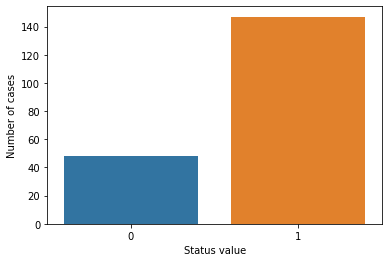

In [5]:
sns.countplot(parkinsons_data['status'].values)
plt.xlabel("Status value")
plt.ylabel("Number of cases")
plt.show()

### Average vocal fundamental frequency MDVP:Fo(Hz)

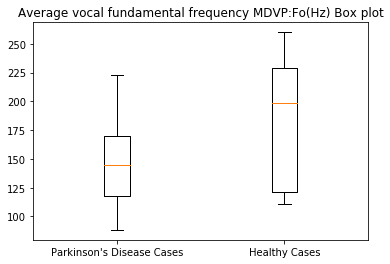

In [6]:
diseased_freq_avg = parkinsons_data[parkinsons_data["status"] == 1]["MDVP:Fo(Hz)"].values
healthy_freq_avg = parkinsons_data[parkinsons_data["status"] == 0]["MDVP:Fo(Hz)"].values

plt.boxplot([diseased_freq_avg, healthy_freq_avg])
plt.title("Average vocal fundamental frequency MDVP:Fo(Hz) Box plot")
plt.xticks([1, 2], ["Parkinson's Disease Cases", "Healthy Cases"])
plt.show()

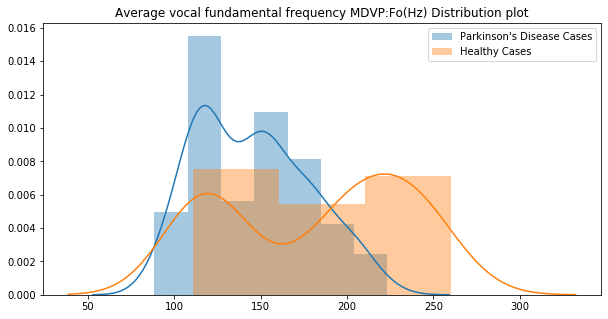

In [7]:
plt.figure(figsize=(10,5))
sns.distplot(diseased_freq_avg, hist=True, label="Parkinson's Disease Cases")
sns.distplot(healthy_freq_avg, hist=True, label="Healthy Cases")
plt.title("Average vocal fundamental frequency MDVP:Fo(Hz) Distribution plot")
plt.legend()
plt.show()

### Maximum vocal fundamental frequency MDVP:Fhi(Hz)

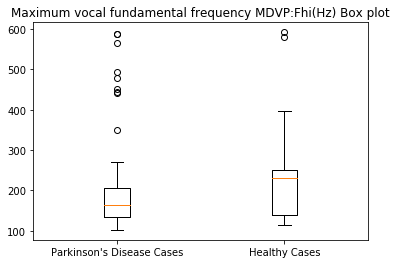

In [8]:
diseased_freq_max = parkinsons_data[parkinsons_data["status"] == 1]["MDVP:Fhi(Hz)"].values
healthy_freq_max = parkinsons_data[parkinsons_data["status"] == 0]["MDVP:Fhi(Hz)"].values

plt.boxplot([diseased_freq_max, healthy_freq_max])
plt.title("Maximum vocal fundamental frequency MDVP:Fhi(Hz) Box plot")
plt.xticks([1, 2], ["Parkinson's Disease Cases", "Healthy Cases"])
plt.show()

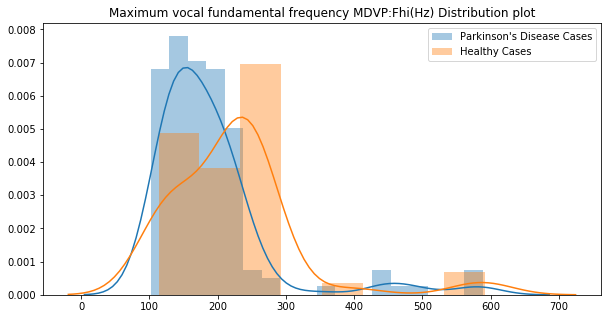

In [9]:
plt.figure(figsize=(10,5))
sns.distplot(diseased_freq_max, hist=True, label="Parkinson's Disease Cases")
sns.distplot(healthy_freq_max, hist=True, label="Healthy Cases")
plt.title("Maximum vocal fundamental frequency MDVP:Fhi(Hz) Distribution plot")
plt.legend()
plt.show()

### Minimum vocal fundamental frequency MDVP:Flo(Hz)

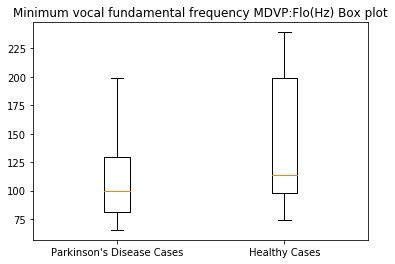

In [10]:
diseased_freq_min = parkinsons_data[parkinsons_data["status"] == 1]["MDVP:Flo(Hz)"].values
healthy_freq_min = parkinsons_data[parkinsons_data["status"] == 0]["MDVP:Flo(Hz)"].values

plt.boxplot([diseased_freq_min, healthy_freq_min])
plt.title("Minimum vocal fundamental frequency MDVP:Flo(Hz) Box plot")
plt.xticks([1, 2], ["Parkinson's Disease Cases", "Healthy Cases"])
plt.show()

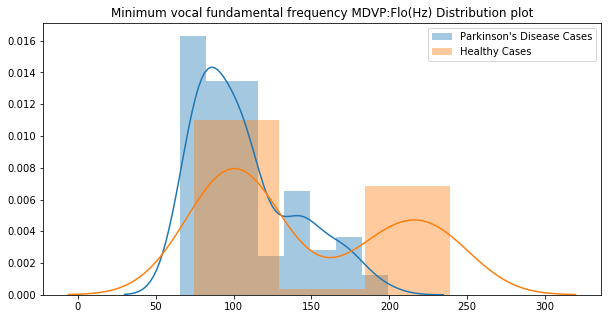

In [11]:
plt.figure(figsize=(10,5))
sns.distplot(diseased_freq_min, hist=True, label="Parkinson's Disease Cases")
sns.distplot(healthy_freq_min, hist=True, label="Healthy Cases")
plt.title("Minimum vocal fundamental frequency MDVP:Flo(Hz) Distribution plot")
plt.legend()
plt.show()

### Measures of variation in fundamental frequency (Jitter)

There are five measures of variation in fundamental frequncy: MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP

### MDVP:Jitter(%)

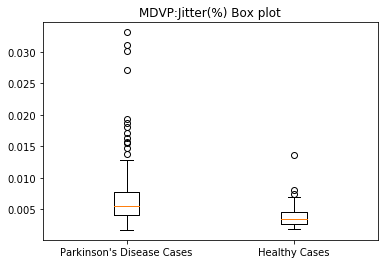

In [12]:
diseased_jitter_perc = parkinsons_data[parkinsons_data["status"] == 1]["MDVP:Jitter(%)"].values
healthy_jitter_perc = parkinsons_data[parkinsons_data["status"] == 0]["MDVP:Jitter(%)"].values

plt.boxplot([diseased_jitter_perc, healthy_jitter_perc])
plt.title("MDVP:Jitter(%) Box plot")
plt.xticks([1, 2], ["Parkinson's Disease Cases", "Healthy Cases"])
plt.show()

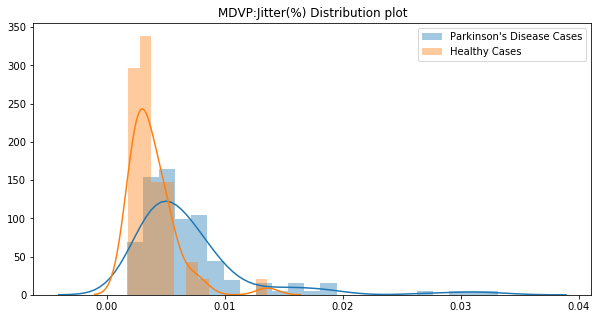

In [13]:
plt.figure(figsize=(10,5))
sns.distplot(diseased_jitter_perc, hist=True, label="Parkinson's Disease Cases")
sns.distplot(healthy_jitter_perc, hist=True, label="Healthy Cases")
plt.title("MDVP:Jitter(%) Distribution plot")
plt.legend()
plt.show()

### MDVP:Jitter(Abs)

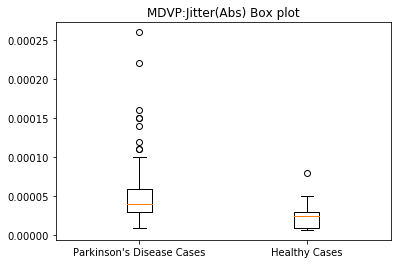

In [14]:
diseased_jitter_abs = parkinsons_data[parkinsons_data["status"] == 1]["MDVP:Jitter(Abs)"].values
healthy_jitter_abs = parkinsons_data[parkinsons_data["status"] == 0]["MDVP:Jitter(Abs)"].values

plt.boxplot([diseased_jitter_abs, healthy_jitter_abs])
plt.title("MDVP:Jitter(Abs) Box plot")
plt.xticks([1, 2], ["Parkinson's Disease Cases", "Healthy Cases"])
plt.show()

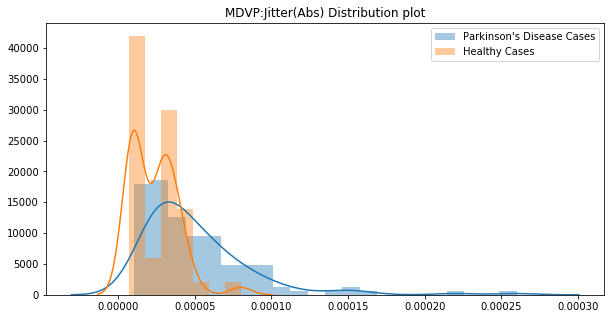

In [15]:
plt.figure(figsize=(10,5))
sns.distplot(diseased_jitter_abs, hist=True, label="Parkinson's Disease Cases")
sns.distplot(healthy_jitter_abs, hist=True, label="Healthy Cases")
plt.title("MDVP:Jitter(Abs) Distribution plot")
plt.legend()
plt.show()

### MDVP:RAP

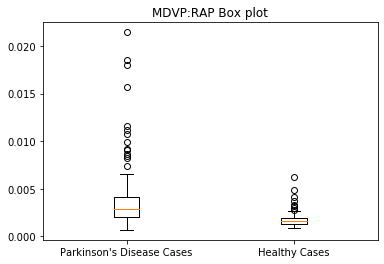

In [16]:
diseased_rap = parkinsons_data[parkinsons_data["status"] == 1]["MDVP:RAP"].values
healthy_rap = parkinsons_data[parkinsons_data["status"] == 0]["MDVP:RAP"].values

plt.boxplot([diseased_rap, healthy_rap])
plt.title("MDVP:RAP Box plot")
plt.xticks([1, 2], ["Parkinson's Disease Cases", "Healthy Cases"])
plt.show()

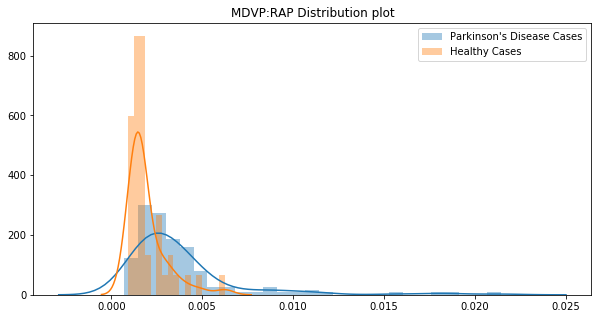

In [17]:
plt.figure(figsize=(10,5))
sns.distplot(diseased_rap, hist=True, label="Parkinson's Disease Cases")
sns.distplot(healthy_rap, hist=True, label="Healthy Cases")
plt.title("MDVP:RAP Distribution plot")
plt.legend()
plt.show()

### MDVP:PPQ

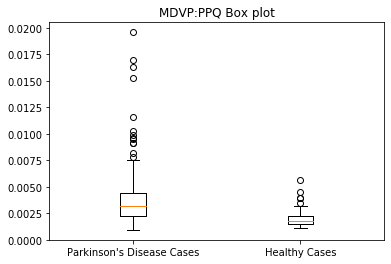

In [18]:
diseased_ppq = parkinsons_data[parkinsons_data["status"] == 1]["MDVP:PPQ"].values
healthy_ppq = parkinsons_data[parkinsons_data["status"] == 0]["MDVP:PPQ"].values

plt.boxplot([diseased_ppq, healthy_ppq])
plt.title("MDVP:PPQ Box plot")
plt.xticks([1, 2], ["Parkinson's Disease Cases", "Healthy Cases"])
plt.show()

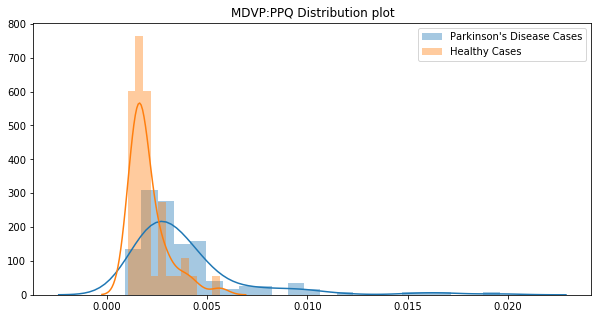

In [19]:
plt.figure(figsize=(10,5))
sns.distplot(diseased_ppq, hist=True, label="Parkinson's Disease Cases")
sns.distplot(healthy_ppq, hist=True, label="Healthy Cases")
plt.title("MDVP:PPQ Distribution plot")
plt.legend()
plt.show()

### Jitter:DDP

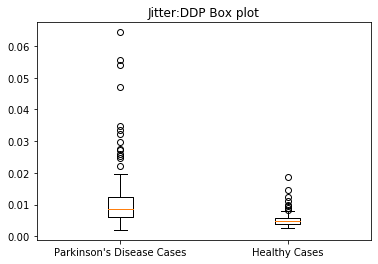

In [20]:
diseased_jitter_ddp = parkinsons_data[parkinsons_data["status"] == 1]["Jitter:DDP"].values
healthy_jitter_ddp = parkinsons_data[parkinsons_data["status"] == 0]["Jitter:DDP"].values

plt.boxplot([diseased_jitter_ddp, healthy_jitter_ddp])
plt.title("Jitter:DDP Box plot")
plt.xticks([1, 2], ["Parkinson's Disease Cases", "Healthy Cases"])
plt.show()

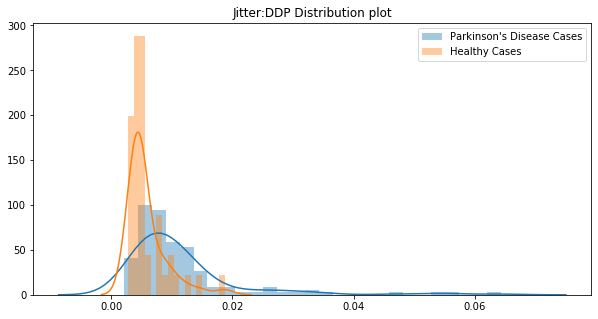

In [21]:
plt.figure(figsize=(10,5))
sns.distplot(diseased_jitter_ddp, hist=True, label="Parkinson's Disease Cases")
sns.distplot(healthy_jitter_ddp, hist=True, label="Healthy Cases")
plt.title("Jitter:DDP Distribution plot")
plt.legend()
plt.show()

### Measures of variation in amplitude (Shimmer)

There are six measures of variation in amplitude - MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA	

### MDVP:Shimmer

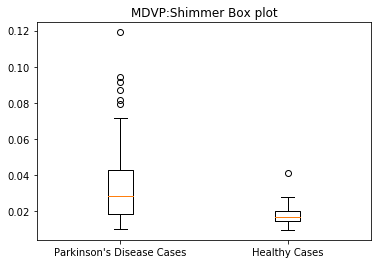

In [22]:
diseased_shimmer = parkinsons_data[parkinsons_data["status"] == 1]["MDVP:Shimmer"].values
healthy_shimmer = parkinsons_data[parkinsons_data["status"] == 0]["MDVP:Shimmer"].values

plt.boxplot([diseased_shimmer, healthy_shimmer])
plt.title("MDVP:Shimmer Box plot")
plt.xticks([1, 2], ["Parkinson's Disease Cases", "Healthy Cases"])
plt.show()

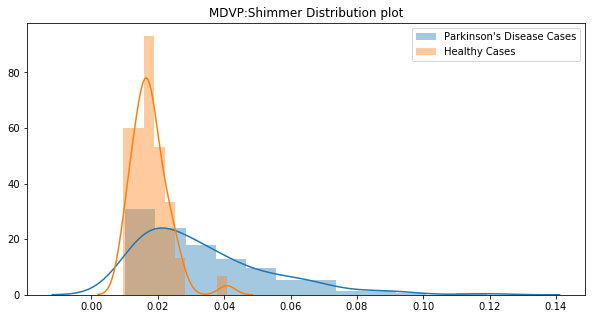

In [23]:
plt.figure(figsize=(10,5))
sns.distplot(diseased_shimmer, hist=True, label="Parkinson's Disease Cases")
sns.distplot(healthy_shimmer, hist=True, label="Healthy Cases")
plt.title("MDVP:Shimmer Distribution plot")
plt.legend()
plt.show()

### MDVP:Shimmer(dB)

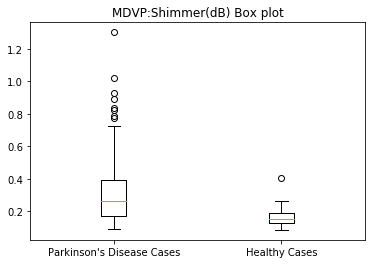

In [24]:
diseased_shimmer_db = parkinsons_data[parkinsons_data["status"] == 1]["MDVP:Shimmer(dB)"].values
healthy_shimmer_db = parkinsons_data[parkinsons_data["status"] == 0]["MDVP:Shimmer(dB)"].values

plt.boxplot([diseased_shimmer_db, healthy_shimmer_db])
plt.title("MDVP:Shimmer(dB) Box plot")
plt.xticks([1, 2], ["Parkinson's Disease Cases", "Healthy Cases"])
plt.show()

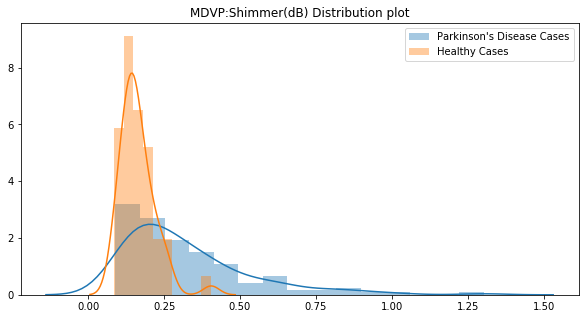

In [25]:
plt.figure(figsize=(10,5))
sns.distplot(diseased_shimmer_db, hist=True, label="Parkinson's Disease Cases")
sns.distplot(healthy_shimmer_db, hist=True, label="Healthy Cases")
plt.title("MDVP:Shimmer(dB) Distribution plot")
plt.legend()
plt.show()

### Shimmer:APQ3

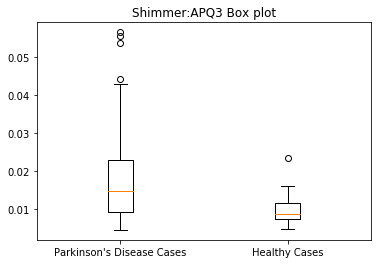

In [26]:
disease_shimmer_apq3 = parkinsons_data[parkinsons_data["status"] == 1]["Shimmer:APQ3"].values
healthy_shimmer_apq3 = parkinsons_data[parkinsons_data["status"] == 0]["Shimmer:APQ3"].values

plt.boxplot([disease_shimmer_apq3, healthy_shimmer_apq3])
plt.title("Shimmer:APQ3 Box plot")
plt.xticks([1, 2], ["Parkinson's Disease Cases", "Healthy Cases"])
plt.show()

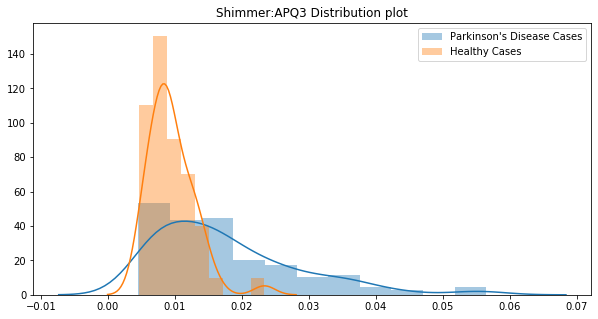

In [27]:
plt.figure(figsize=(10,5))
sns.distplot(disease_shimmer_apq3, hist=True, label="Parkinson's Disease Cases")
sns.distplot(healthy_shimmer_apq3, hist=True, label="Healthy Cases")
plt.title("Shimmer:APQ3 Distribution plot")
plt.legend()
plt.show()

### Shimmer:APQ5

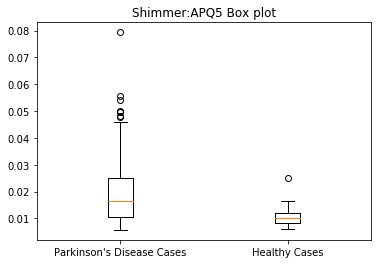

In [28]:
diseased_shimmer_apq5 = parkinsons_data[parkinsons_data["status"] == 1]["Shimmer:APQ5"].values
healthy_shimmer_apq5 = parkinsons_data[parkinsons_data["status"] == 0]["Shimmer:APQ5"].values

plt.boxplot([diseased_shimmer_apq5, healthy_shimmer_apq5])
plt.title("Shimmer:APQ5 Box plot")
plt.xticks([1, 2], ["Parkinson's Disease Cases", "Healthy Cases"])
plt.show()

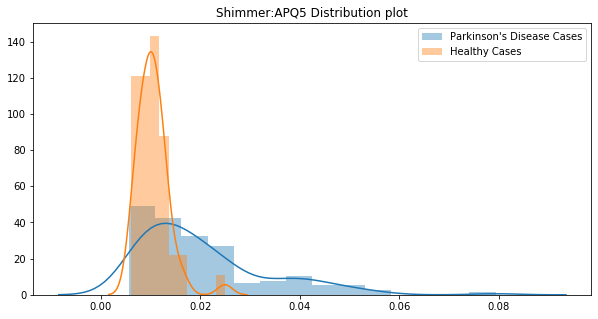

In [29]:
plt.figure(figsize=(10,5))
sns.distplot(diseased_shimmer_apq5, hist=True, label="Parkinson's Disease Cases")
sns.distplot(healthy_shimmer_apq5, hist=True, label="Healthy Cases")
plt.title("Shimmer:APQ5 Distribution plot")
plt.legend()
plt.show()

### MDVP:APQ

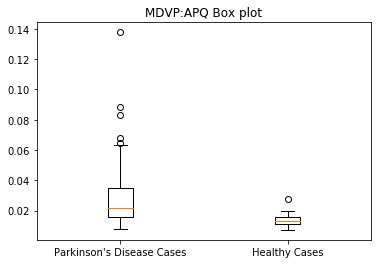

In [30]:
diseased_apq = parkinsons_data[parkinsons_data["status"] == 1]["MDVP:APQ"].values
healthy_apq = parkinsons_data[parkinsons_data["status"] == 0]["MDVP:APQ"].values

plt.boxplot([diseased_apq, healthy_apq])
plt.title("MDVP:APQ Box plot")
plt.xticks([1, 2], ["Parkinson's Disease Cases", "Healthy Cases"])
plt.show()

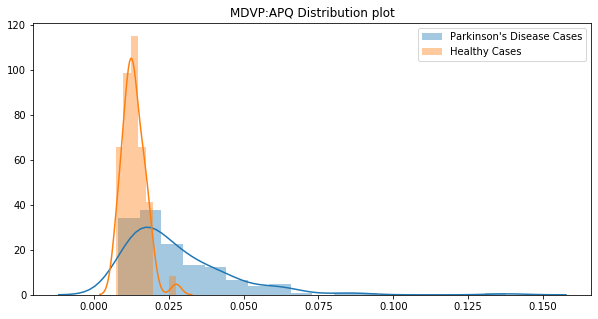

In [31]:
plt.figure(figsize=(10,5))
sns.distplot(diseased_apq, hist=True, label="Parkinson's Disease Cases")
sns.distplot(healthy_apq, hist=True, label="Healthy Cases")
plt.title("MDVP:APQ Distribution plot")
plt.legend()
plt.show()

### Shimmer:DDA

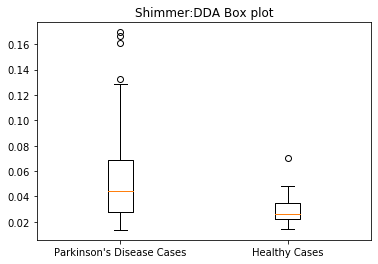

In [32]:
diseased_shimmer_dda = parkinsons_data[parkinsons_data["status"] == 1]["Shimmer:DDA"].values
healthy_shimmer_dda = parkinsons_data[parkinsons_data["status"] == 0]["Shimmer:DDA"].values

plt.boxplot([diseased_shimmer_dda, healthy_shimmer_dda])
plt.title("Shimmer:DDA Box plot")
plt.xticks([1, 2], ["Parkinson's Disease Cases", "Healthy Cases"])
plt.show()

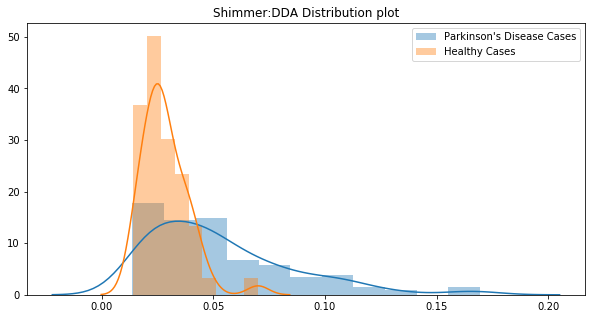

In [33]:
plt.figure(figsize=(10,5))
sns.distplot(diseased_shimmer_dda, hist=True, label="Parkinson's Disease Cases")
sns.distplot(healthy_shimmer_dda, hist=True, label="Healthy Cases")
plt.title("Shimmer:DDA Distribution plot")
plt.legend()
plt.show()

### Two measures of ratio of noise to tonal components in the voice

There are two measures of ratio of noise to tonal components in the voice - NHR,HNR

### NHR

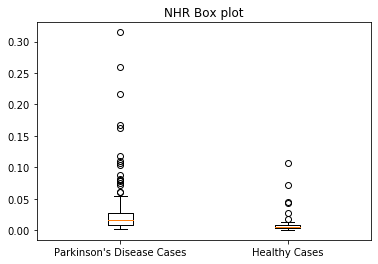

In [34]:
diseased_nhr = parkinsons_data[parkinsons_data["status"] == 1]["NHR"].values
healthy_nhr = parkinsons_data[parkinsons_data["status"] == 0]["NHR"].values

plt.boxplot([diseased_nhr, healthy_nhr])
plt.title("NHR Box plot")
plt.xticks([1, 2], ["Parkinson's Disease Cases", "Healthy Cases"])
plt.show()

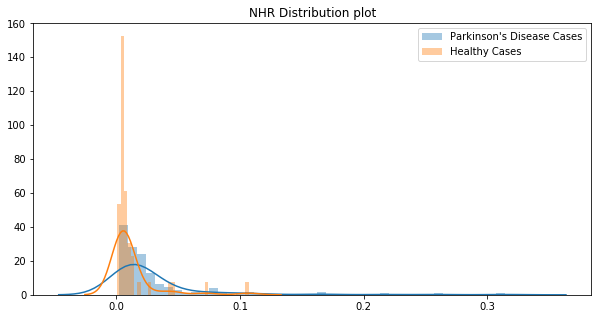

In [35]:
plt.figure(figsize=(10,5))
sns.distplot(diseased_nhr, hist=True, label="Parkinson's Disease Cases")
sns.distplot(healthy_nhr, hist=True, label="Healthy Cases")
plt.title("NHR Distribution plot")
plt.legend()
plt.show()

### HNR

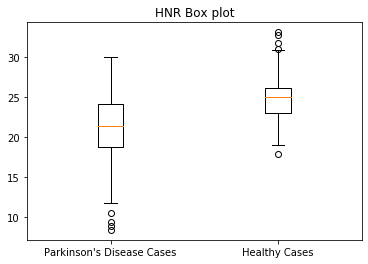

In [36]:
diseased_hnr = parkinsons_data[parkinsons_data["status"] == 1]["HNR"].values
healthy_hnr = parkinsons_data[parkinsons_data["status"] == 0]["HNR"].values

plt.boxplot([diseased_hnr, healthy_hnr])
plt.title("HNR Box plot")
plt.xticks([1, 2], ["Parkinson's Disease Cases", "Healthy Cases"])
plt.show()

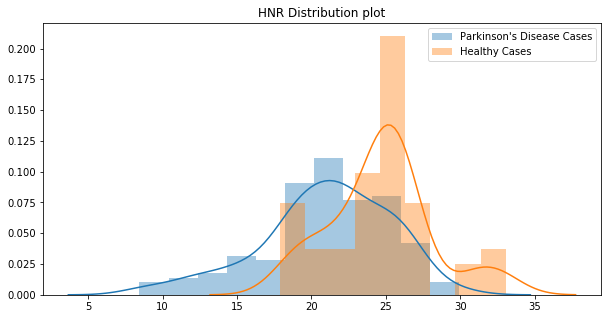

In [37]:
plt.figure(figsize=(10,5))
sns.distplot(diseased_hnr, hist=True, label="Parkinson's Disease Cases")
sns.distplot(healthy_hnr, hist=True, label="Healthy Cases")
plt.title("HNR Distribution plot")
plt.legend()
plt.show()

### Two nonlinear dynamical complexity measures

There are two nonlinear dynamical complexity measures - RPDE, D2

### RPDE

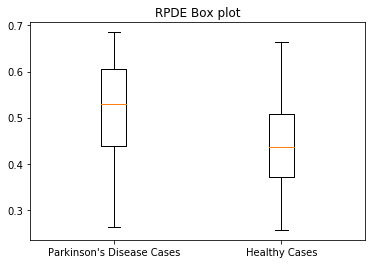

In [38]:
diseased_rpde = parkinsons_data[parkinsons_data["status"] == 1]["RPDE"].values
healthy_rpde = parkinsons_data[parkinsons_data["status"] == 0]["RPDE"].values

plt.boxplot([diseased_rpde, healthy_rpde])
plt.title("RPDE Box plot")
plt.xticks([1, 2], ["Parkinson's Disease Cases", "Healthy Cases"])
plt.show()

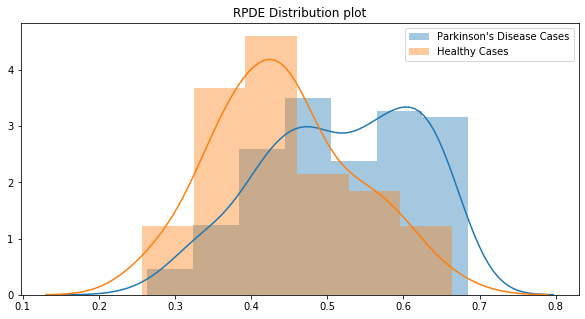

In [39]:
plt.figure(figsize=(10,5))
sns.distplot(diseased_rpde, hist=True, label="Parkinson's Disease Cases")
sns.distplot(healthy_rpde, hist=True, label="Healthy Cases")
plt.title("RPDE Distribution plot")
plt.legend()
plt.show()

### D2

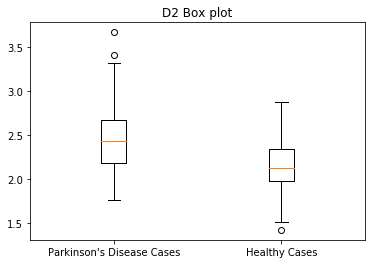

In [40]:
diseased_d2 = parkinsons_data[parkinsons_data["status"] == 1]["D2"].values
healthy_d2 = parkinsons_data[parkinsons_data["status"] == 0]["D2"].values

plt.boxplot([diseased_d2, healthy_d2])
plt.title("D2 Box plot")
plt.xticks([1, 2], ["Parkinson's Disease Cases", "Healthy Cases"])
plt.show()

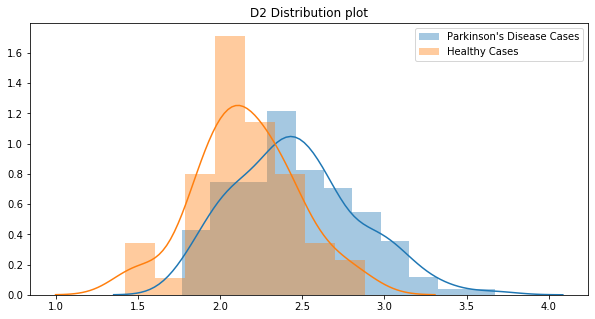

In [41]:
plt.figure(figsize=(10,5))
sns.distplot(diseased_d2, hist=True, label="Parkinson's Disease Cases")
sns.distplot(healthy_d2, hist=True, label="Healthy Cases")
plt.title("D2 Distribution plot")
plt.legend()
plt.show()

### Three nonlinear measures of fundamental frequency variation

There are three nonlinear measures of fundamental frequency variation - spread1, spread2, PPE

### spread1

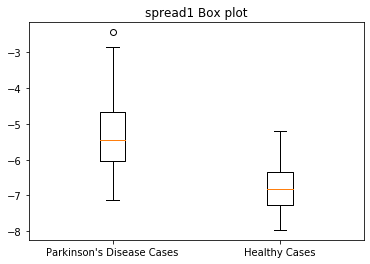

In [42]:
diseased_spread1 = parkinsons_data[parkinsons_data["status"] == 1]["spread1"].values
healthy_spread1 = parkinsons_data[parkinsons_data["status"] == 0]["spread1"].values

plt.boxplot([diseased_spread1, healthy_spread1])
plt.title("spread1 Box plot")
plt.xticks([1, 2], ["Parkinson's Disease Cases", "Healthy Cases"])
plt.show()

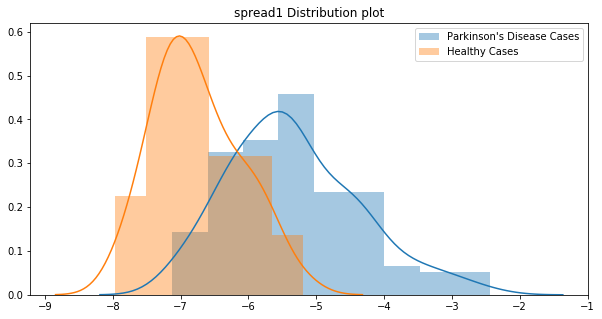

In [43]:
plt.figure(figsize=(10,5))
sns.distplot(diseased_spread1, hist=True, label="Parkinson's Disease Cases")
sns.distplot(healthy_spread1, hist=True, label="Healthy Cases")
plt.title("spread1 Distribution plot")
plt.legend()
plt.show()

### spread2

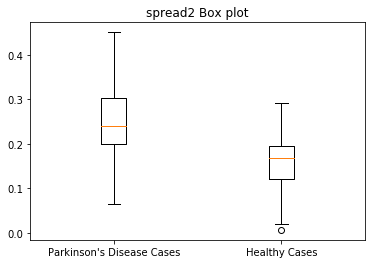

In [44]:
diseased_spread2 = parkinsons_data[parkinsons_data["status"] == 1]["spread2"].values
healthy_spread2 = parkinsons_data[parkinsons_data["status"] == 0]["spread2"].values

plt.boxplot([diseased_spread2, healthy_spread2])
plt.title("spread2 Box plot")
plt.xticks([1, 2], ["Parkinson's Disease Cases", "Healthy Cases"])
plt.show()

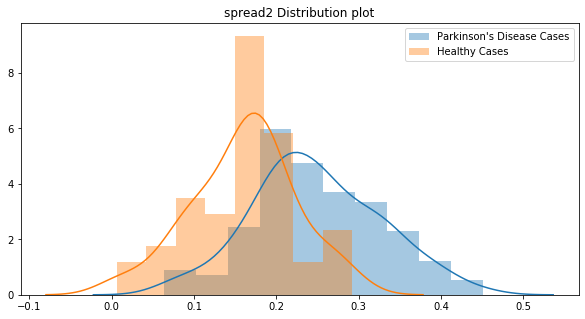

In [45]:
plt.figure(figsize=(10,5))
sns.distplot(diseased_spread2, hist=True, label="Parkinson's Disease Cases")
sns.distplot(healthy_spread2, hist=True, label="Healthy Cases")
plt.title("spread2 Distribution plot")
plt.legend()
plt.show()

### PPE

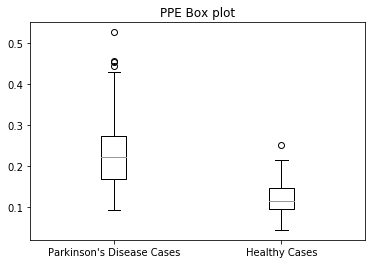

In [46]:
diseased_ppe = parkinsons_data[parkinsons_data["status"] == 1]["PPE"].values
healthy_ppe = parkinsons_data[parkinsons_data["status"] == 0]["PPE"].values

plt.boxplot([diseased_ppe, healthy_ppe])
plt.title("PPE Box plot")
plt.xticks([1, 2], ["Parkinson's Disease Cases", "Healthy Cases"])
plt.show()

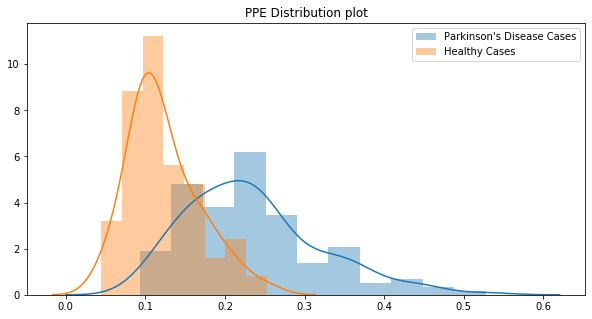

In [47]:
plt.figure(figsize=(10,5))
sns.distplot(diseased_ppe, hist=True, label="Parkinson's Disease Cases")
sns.distplot(healthy_ppe, hist=True, label="Healthy Cases")
plt.title("PPE Distribution plot")
plt.legend()
plt.show()

### Signal fractal scaling exponent - DFA

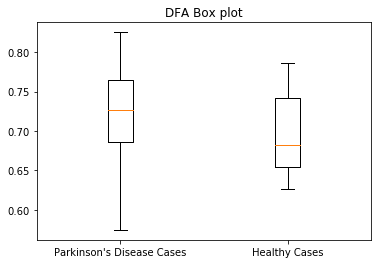

In [48]:
diseased_dfa = parkinsons_data[parkinsons_data["status"] == 1]["DFA"].values
healthy_dfa = parkinsons_data[parkinsons_data["status"] == 0]["DFA"].values

plt.boxplot([diseased_dfa, healthy_dfa])
plt.title("DFA Box plot")
plt.xticks([1, 2], ["Parkinson's Disease Cases", "Healthy Cases"])
plt.show()

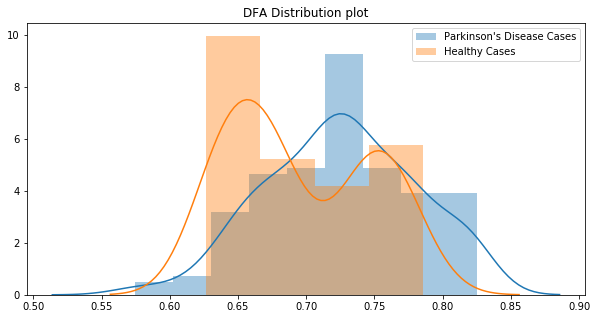

In [49]:
plt.figure(figsize=(10,5))
sns.distplot(diseased_dfa, hist=True, label="Parkinson's Disease Cases")
sns.distplot(healthy_dfa, hist=True, label="Healthy Cases")
plt.title("DFA Distribution plot")
plt.legend()
plt.show()

## Bivariate Analysis

In [50]:
parkinsons_data.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


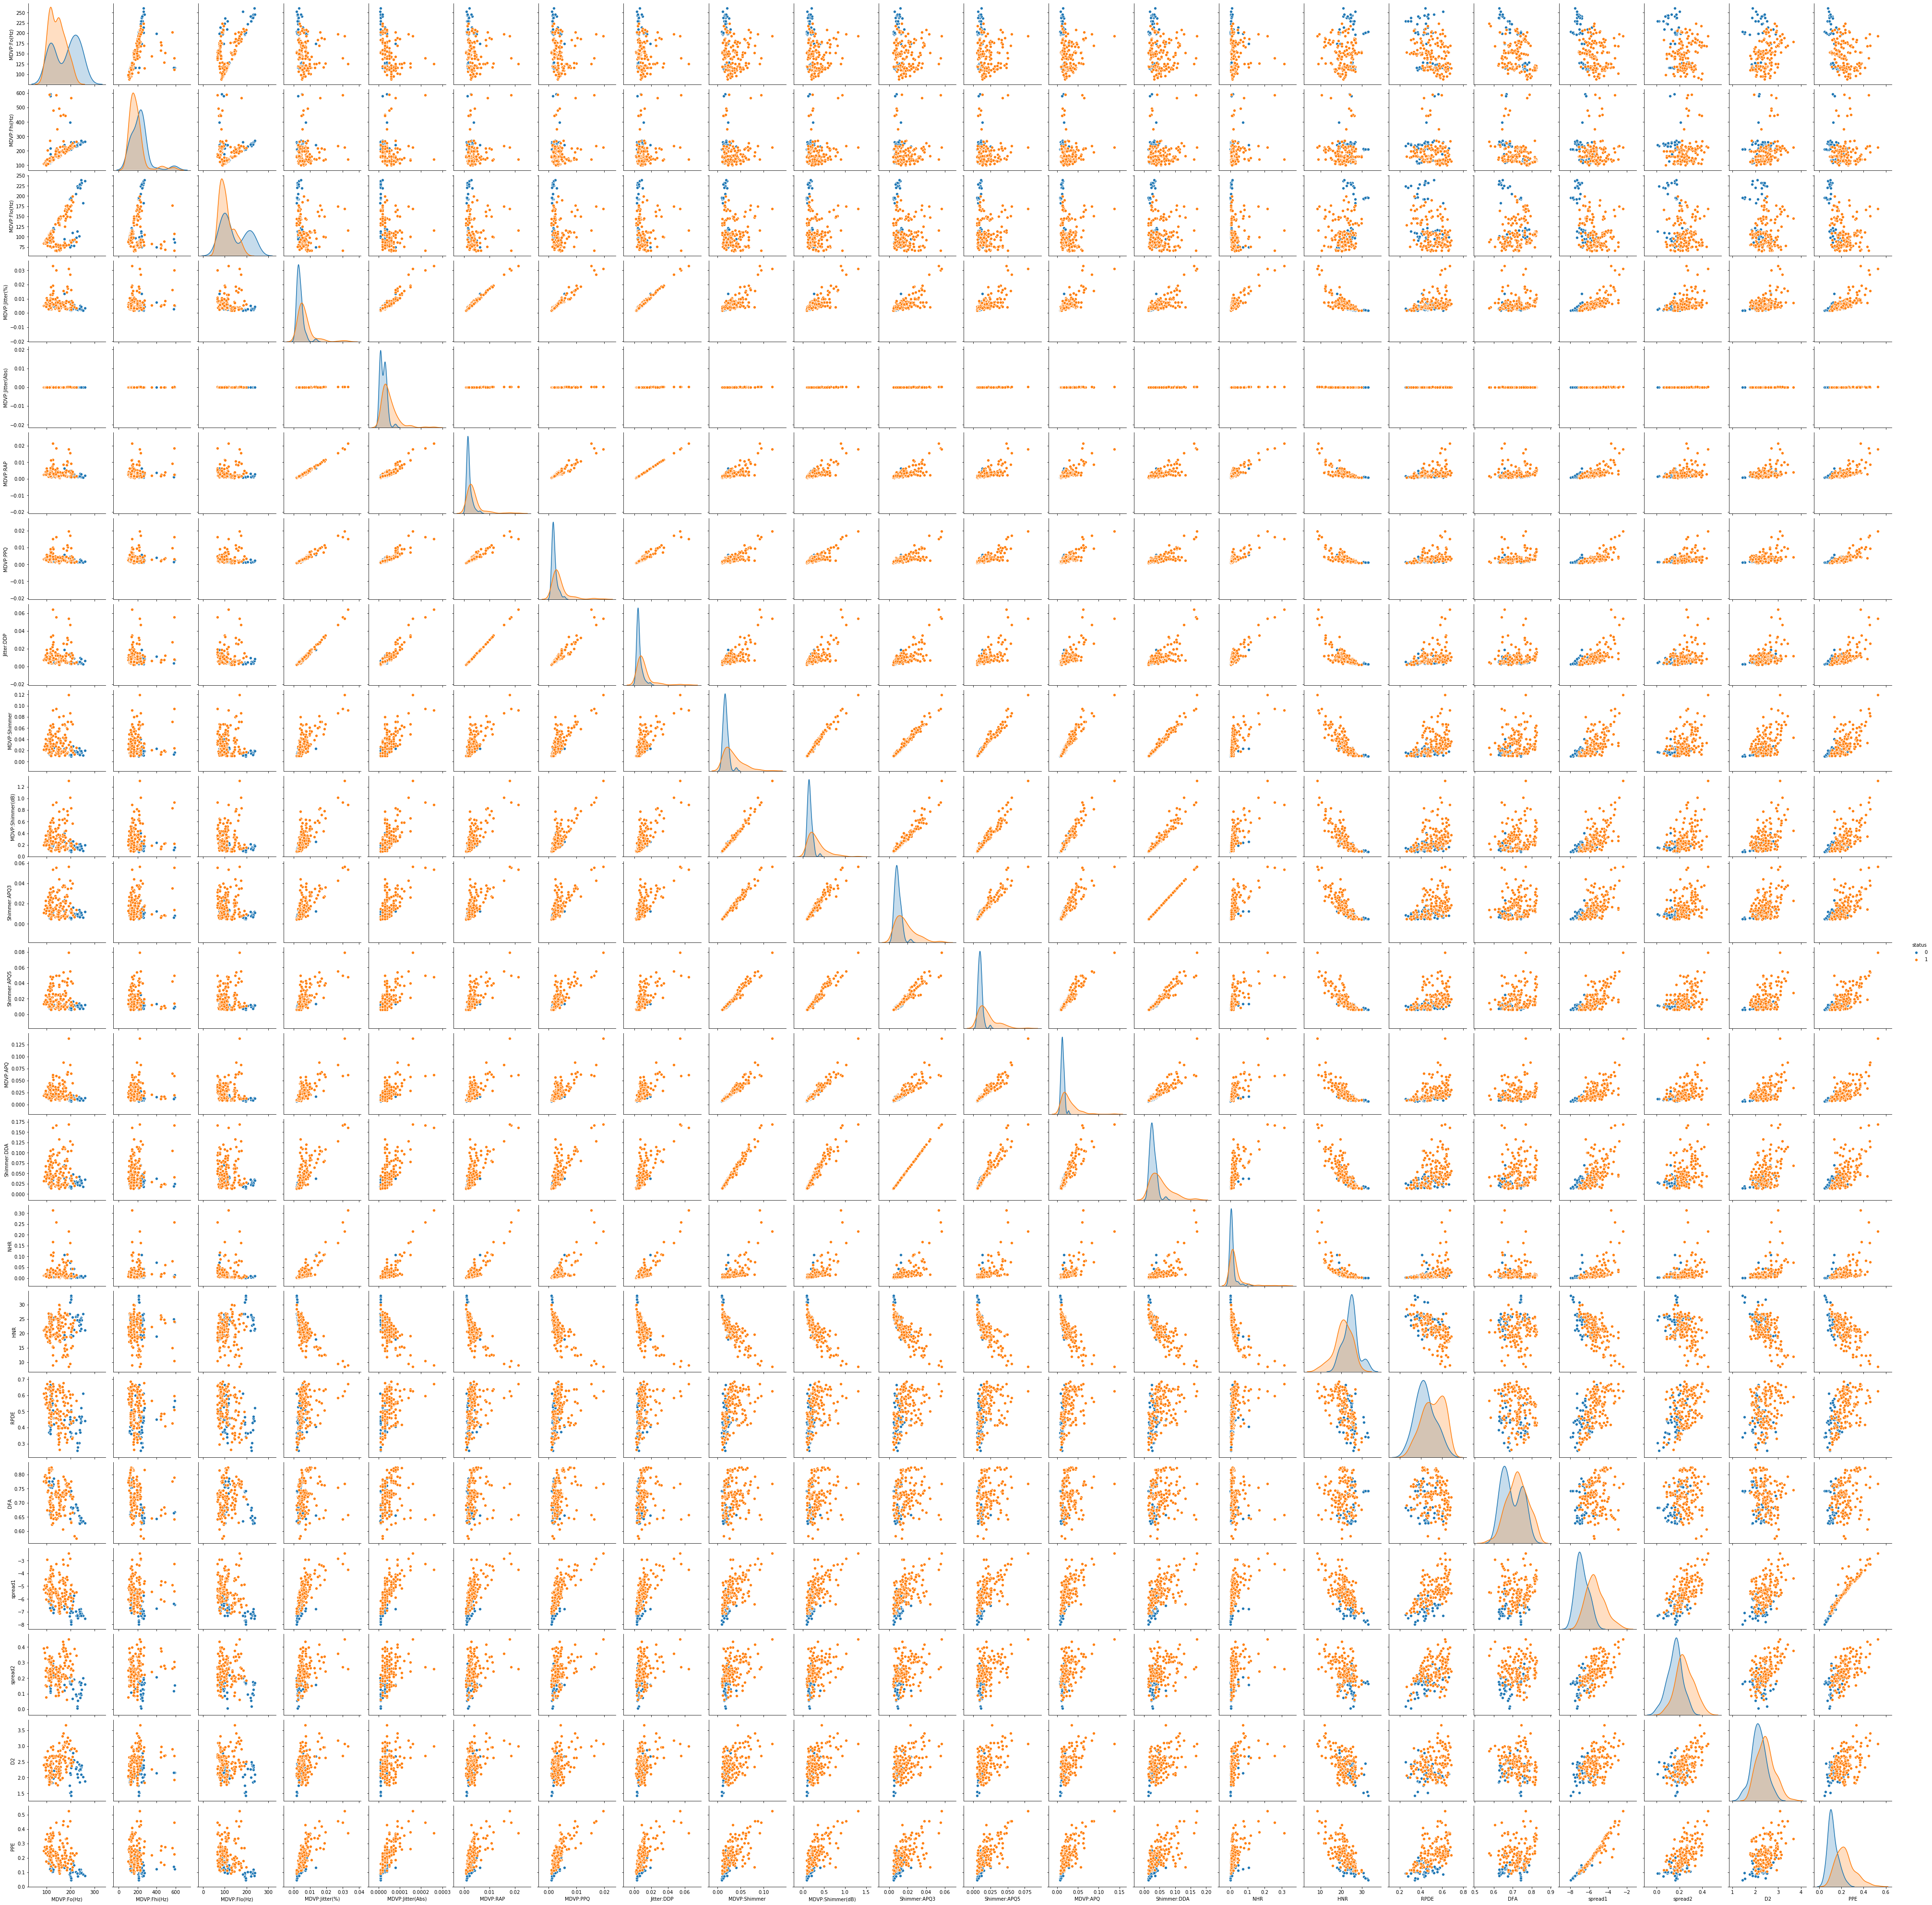

In [51]:
sns.pairplot(parkinsons_data, hue="status", diag_kind='kde')

## Prediction of Parkinson's Disease using Logistic Regression

In this model I used **Pipleline**, **GridSearchCV** for the iterative method on **LogisticRegression** model to find out the best accuracy and fine tuned parameter "C". I also used **StandardScaler** to scale the inputs. The data is clean so there is no need to any pre-cleaning of the data.

In [52]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create data set
y = parkinsons_data["status"]
X = parkinsons_data.drop(["name", "status"], axis=1)

# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('logreg', LogisticRegression())]

pipeline = Pipeline(steps)

# Create the hyperparameter grid
parameters = {'logreg__C': np.logspace(-2, 8, 15)}

# Creating train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=102)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, parameters)

# Fit to the training set
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

D:\Anaconda3\envs\cv-nd\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda3\envs\cv-nd\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

D:\Anaconda3\envs\cv-nd\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda3\envs\cv-nd\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

D:\Anaconda3\envs\cv-nd\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda3\envs\cv-nd\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

Accuracy: 0.8983050847457628
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        15
           1       0.93      0.93      0.93        44

    accuracy                           0.90        59
   macro avg       0.87      0.87      0.87        59
weighted avg       0.90      0.90      0.90        59

Tuned Model Parameters: {'logreg__C': 7.196856730011521}


D:\Anaconda3\envs\cv-nd\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda3\envs\cv-nd\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

The best accuracy achieved is **89.83%** with the parameter `C = 7.196856730011521`